In [2]:
# Breast Cancer Classification Project
# AI in Biology - Jupyter Notebook Scaffold

# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [3]:
# -------------------------------
# 2. Load and Inspect Data
# -------------------------------
# Replace with actual path if downloading locally
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)
data.drop("ID", axis=1, inplace=True)
print(data.head())
print(data.describe())
print(data.isnull().sum())

  Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         M      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1         M      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2         M      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3         M      11.42      20.38      77.58      386.1    0.14250    0.28390   
4         M      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   feature_7  feature_8  feature_9  ...  feature_21  feature_22  feature_23  \
0     0.3001    0.14710     0.2419  ...       25.38       17.33      184.60   
1     0.0869    0.07017     0.1812  ...       24.99       23.41      158.80   
2     0.1974    0.12790     0.2069  ...       23.57       25.53      152.50   
3     0.2414    0.10520     0.2597  ...       14.91       26.50       98.87   
4     0.1980    0.10430     0.1809  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26 

In [4]:
#Fix loading 2 so data columns are named
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
data = pd.read_csv(url, header=None, names=columns)
data.drop("ID", axis=1, inplace=True)

In [5]:
# -------------------------------
# 3. Preprocess Data
# -------------------------------
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# -------------------------------
# 4. Baseline Model - Logistic Regression
# -------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:

# -------------------------------
# 5. Model 2 - Random Forest with Hyperparameter Tuning
# -------------------------------
rf = RandomForestClassifier(random_state=42)
params_rf = {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
# -------------------------------
# 6. Model 3 - MLP Classifier
# -------------------------------
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classifier Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



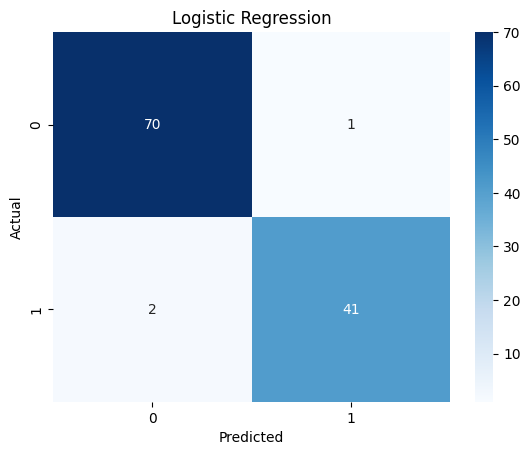

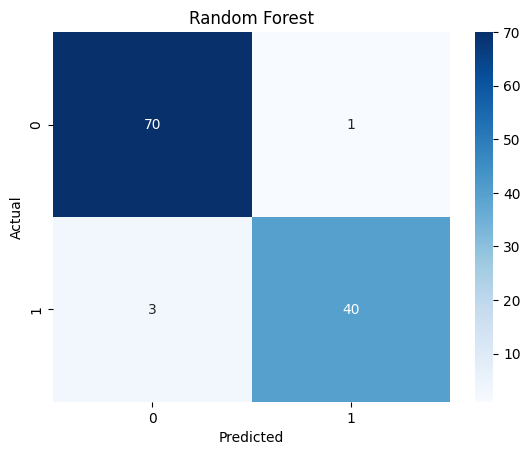

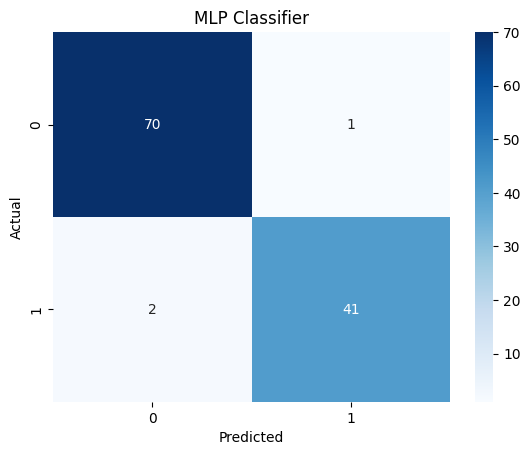

In [9]:
# -------------------------------
# 7. Visualization and Evaluation
# -------------------------------
def plot_confusion(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion("Logistic Regression", y_test, y_pred_lr)
plot_confusion("Random Forest", y_test, y_pred_rf)
plot_confusion("MLP Classifier", y_test, y_pred_mlp)

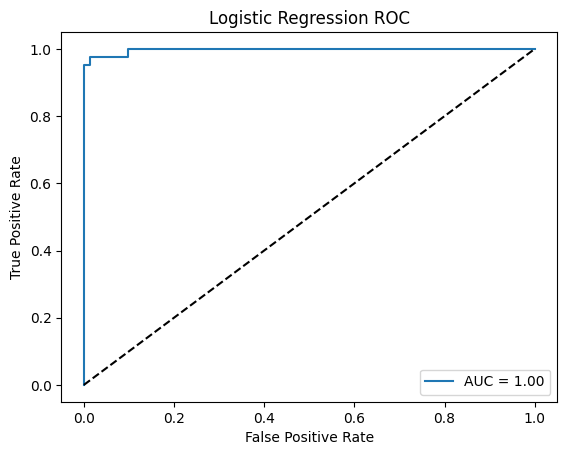

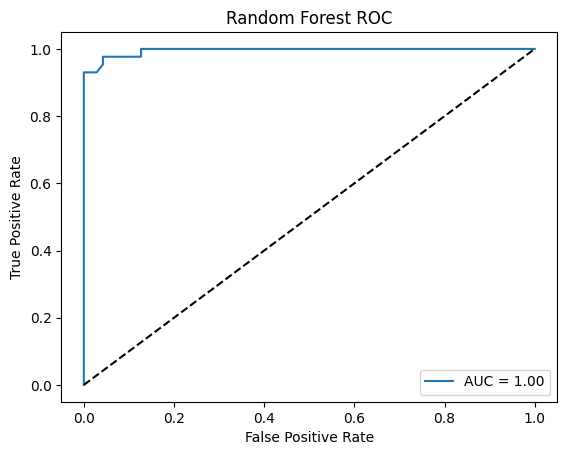

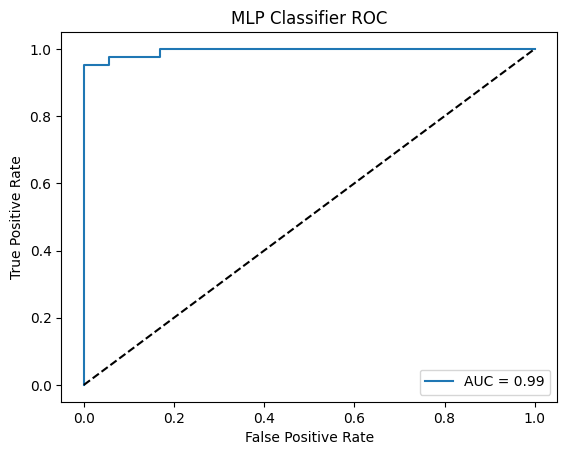

In [10]:
def plot_roc(title, y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Example:
plot_roc("Logistic Regression ROC", y_test, lr.predict_proba(X_test)[:, 1])
plot_roc("Random Forest ROC", y_test, best_rf.predict_proba(X_test)[:, 1])
plot_roc("MLP Classifier ROC", y_test, mlp.predict_proba(X_test)[:, 1])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se     

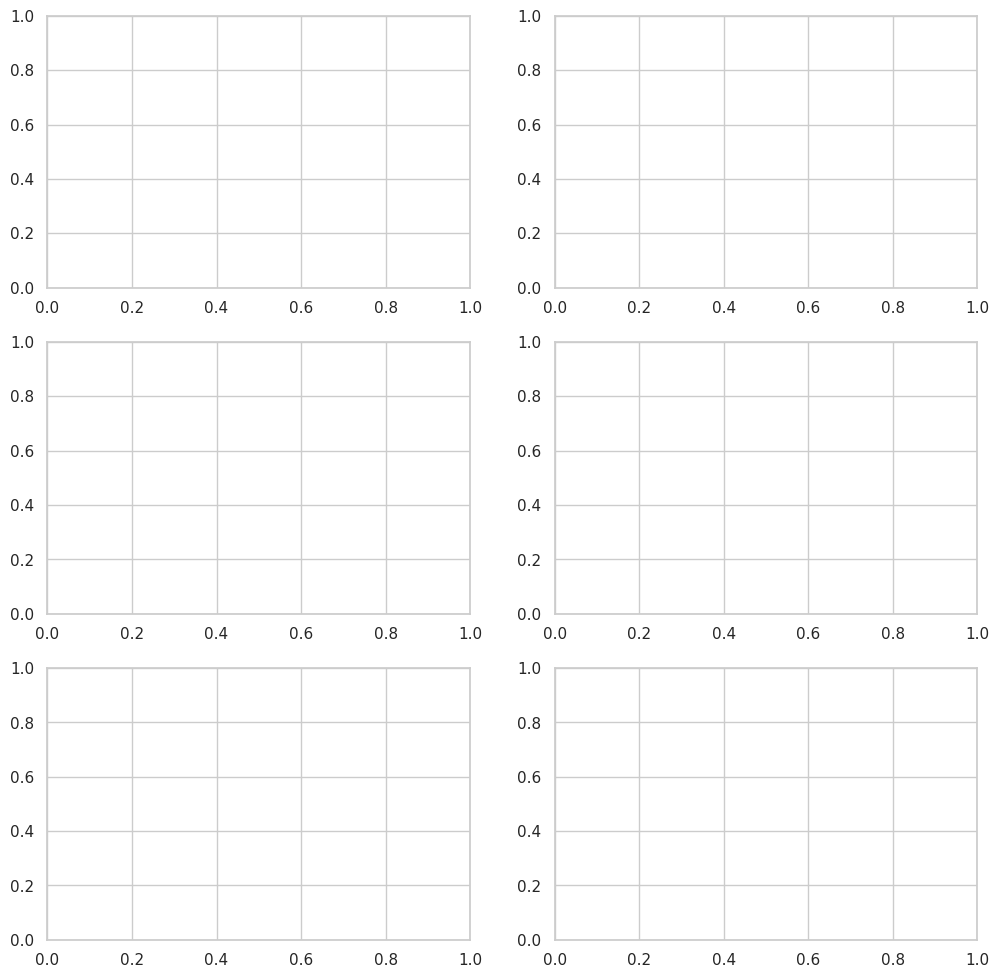

In [11]:
#Brief analysis of properties and their distributions across the classes

import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Set plot style
sns.set(style="whitegrid")

# Plot histograms for key features
fig, axes = plt.subplots(3, 2, figsize=(12,12))
features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', '']


SVM Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



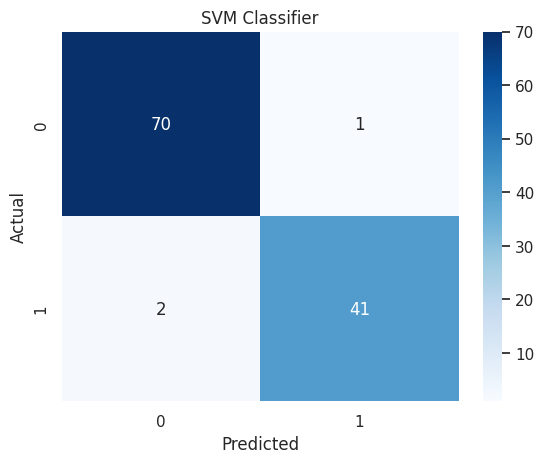

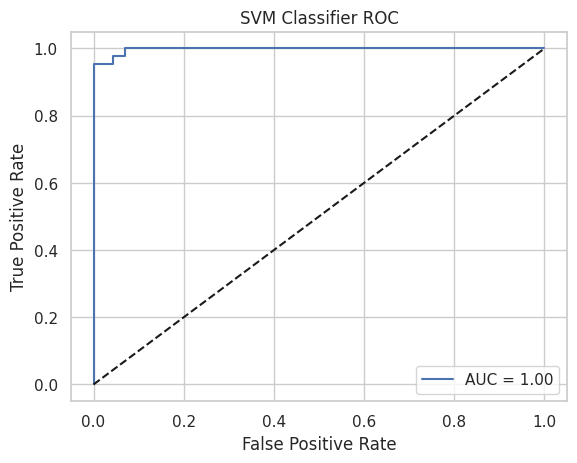

In [12]:
#SVM
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classifier Report:\n", classification_report(y_test, y_pred_svm))
plot_confusion("SVM Classifier", y_test, y_pred_svm)
plot_roc("SVM Classifier ROC", y_test, svm.predict_proba(X_test)[:, 1])

In [13]:
#KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Map cluster labels to match diagnosis labels
# (you might need to flip 0/1 depending on how it clusters)

from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Index (clustering vs actual labels):", adjusted_rand_score(y, clusters))

Adjusted Rand Index (clustering vs actual labels): 0.676504895633523


In [14]:
data.columns
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print(features_se)
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


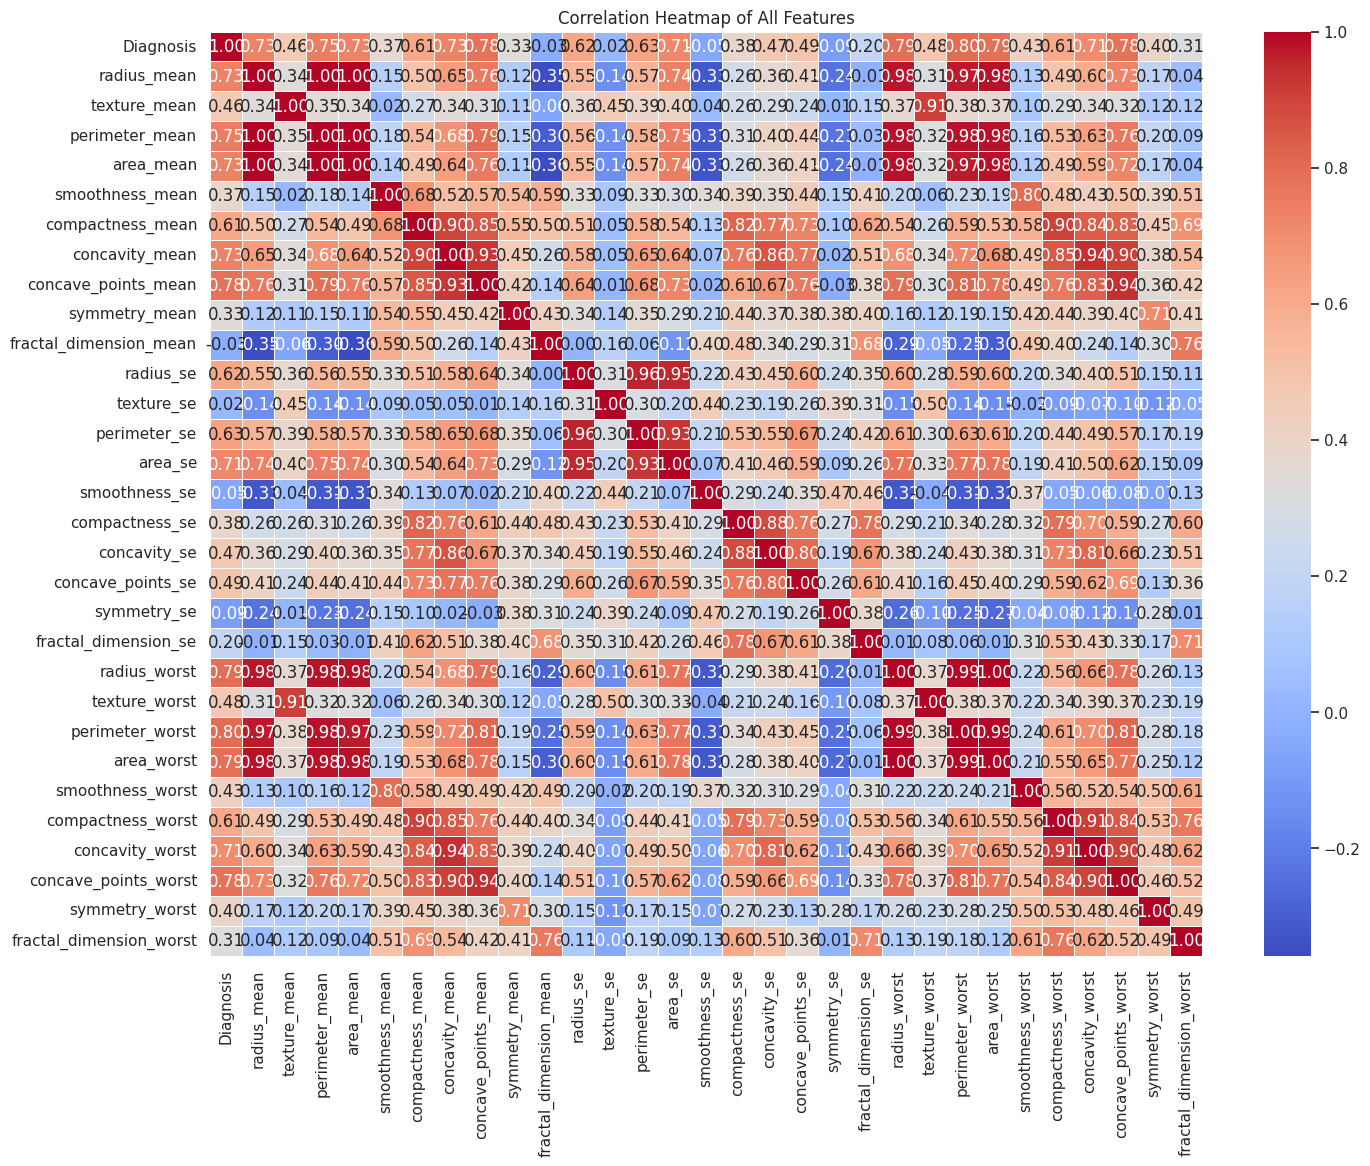

In [15]:
#Correlation heatmap for all features
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].astype('float32')
corr=data.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot=True)  
plt.title('Correlation Heatmap of All Features')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Mean Features')

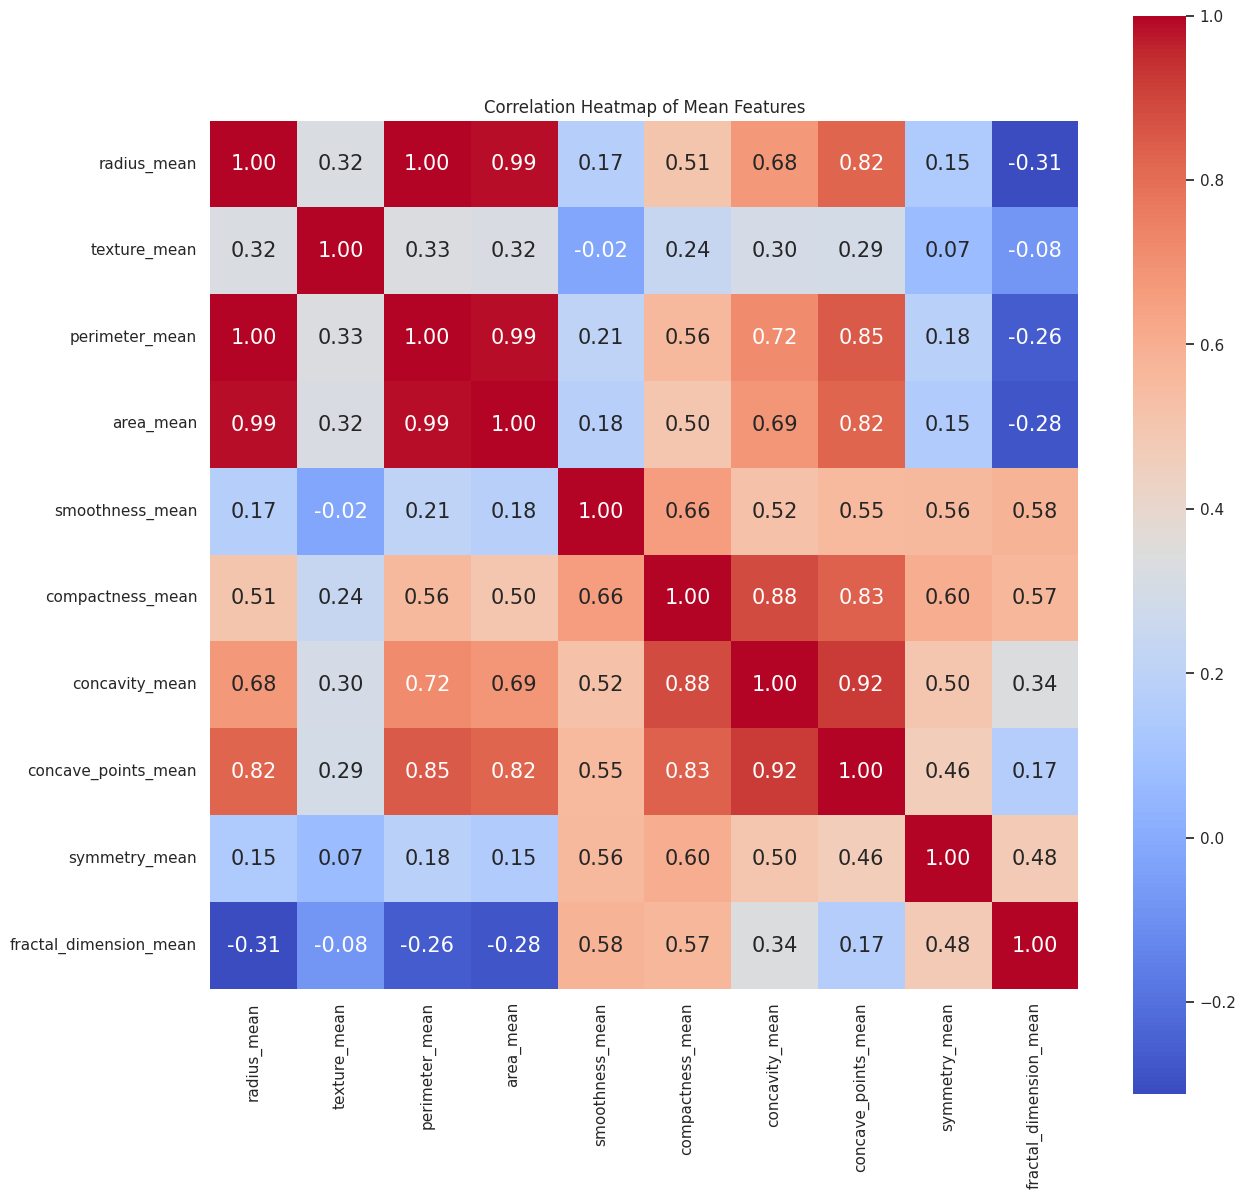

In [16]:
#Heatmap with mean features
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')
plt.title('Correlation Heatmap of Mean Features')

Interpretation:
+1 indicates a perfect positive correlation
-1 indicates a perfect negative correlation
0 indicates no linear correlation

Observations:
- The radius, parameter, and area are highly correlated, so from these, use any one of them. We use only one of these features to avoid multicollinearity in many modeling techniques.
- High positive correlation among compactness_mean, concavity_mean, and concave_points_mean. These features are all related to the shape and indentations of the cell nucleus. Higher compactness and concavity would naturally lead to more pronounced concave points. Thus, select one representative feature from this group (like compactness_mean) for dimensionality reduction.
---> The selected parameters cover different aspects of the cell nucleus characteristics with minimal redundancy.

Other considerations:
- Negative Correlations: Negative correlations, such as between fractal_dimension_mean and radius_mean, perimeter_mean, and area_mean. This suggests that as the size of the nucleus increases, its fractal dimension tends to decrease. This could imply that larger nuclei have smoother or less complex boundaries.
- Future Direction: the initial selection of features (perimeter_mean, texture_mean, compactness_mean, symmetry_mean, and smoothness_mean) is by correlation analysis to mitigate multicollinearity. Future work should focus on exploring other potential feature combinations, which is important to improve model performance and reduce complexity.

In [17]:
#Use the 5 parameters for predicition
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

#Split data into train and test
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [25]:
#Retrain model only using the selected 5 features instead of all
X_train_reduced = train[prediction_var]
y_train_reduced = train['Diagnosis']

X_test_reduced = test[prediction_var]
y_test_reduced = test['Diagnosis']

# Scale the data
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

In [24]:
#Logistic Regression
lr_reduced = LogisticRegression(max_iter=1000)
lr_reduced.fit(X_train_reduced_scaled, y_train_reduced)
y_pred_lr_reduced = lr_reduced.predict(X_test_reduced_scaled)
print("Logistic Regression (Reduced Features) Report:\n", classification_report(y_test_reduced, y_pred_lr_reduced))

#Random Forest
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced_scaled, y_train_reduced)
y_pred_rf_reduced = rf_reduced.predict(X_test_reduced_scaled)
print("Random Forest (Reduced Features) Report:\n", classification_report(y_test_reduced, y_pred_rf_reduced))

#MLP Classifier
mlp_reduced = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_reduced.fit(X_train_reduced_scaled, y_train_reduced)
y_pred_mlp_reduced = mlp_reduced.predict(X_test_reduced_scaled)
print("MLP Classifier (Reduced Features) Report:\n", classification_report(y_test_reduced, y_pred_mlp_reduced))

#SVM
svm_reduced = SVC(probability=True, random_state=42)
svm_reduced.fit(X_train_reduced_scaled, y_train_reduced)
y_pred_svm_reduced = svm_reduced.predict(X_test_reduced_scaled)
print("SVM (Reduced Features) Report:\n", classification_report(y_test_reduced, y_pred_svm_reduced))

Logistic Regression (Reduced Features) Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       110
           1       0.93      0.89      0.91        61

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Random Forest (Reduced Features) Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       110
           1       0.95      0.90      0.92        61

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

MLP Classifier (Reduced Features) Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.93      0.92      0.93        61

    accuracy                           0.95      

Reduced discussion:

Interpretation: After reducing from 30 features to 5 based on correlation analysis, model performance remained high, with accuracies ranging from 94-95%. Random Forest and MLP Classifier performed best, with the MLP showing the highest recall for malignant cases (Recall 1 was 92%). Thus, dimensionality reduction successfully preserved important information, enabling simpler and effective modeling.

HOWEVER, recall went down after feature reduction.

- 5 features were selected based on correlation to avoid multicollinearity, but predictive power was also lost when majority of the features were removed. Especially for more subtle differences, missing features matter.
- More features = more chances for the model to catch the pattern
- Less features = simpler model, slightly worse detection

Recall for malignant is important here (you do not want false negatives). It is a tradeoff using fewer features, as it is faster and overfits less, but has lower recall (thus higher risk of missing malignant tumors in detection)

In [26]:
#Better feature selection
#1. Train Random Forest on full data
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(X_train, y_train)

#2. Get feature importances
importances = rf_full.feature_importances_
feature_names = X.columns

#3. Sort features by importance
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance.head(10))

area_worst              0.153892
concave_points_worst    0.144663
concave_points_mean     0.106210
radius_worst            0.077987
concavity_mean          0.068001
perimeter_worst         0.067115
perimeter_mean          0.053270
radius_mean             0.048703
area_mean               0.047555
concavity_worst         0.031802
dtype: float64


Instead of only using correlation to pick features and avoid overlap between them, we can use feature importance. This method shows us how much each feature helps the model make accurate predictions. For example, models like Random Forest can give us scores for each feature to tell us which ones are the most helpful in predicting the target (like cancer being malignant or benign).

By focusing on the top features with the highest importance, we're making sure that the features we keep aren't just similar to each other, but are actually the ones that help the model the most in identifying whether something is malignant or benign. This approach helps keep useful details that might get lost if we only look at correlation.

In [32]:
#Models using feature selection method
##Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Select the important features
important_features = ['area_worst', 'concave_points_worst', 'concave_points_mean', 
                      'radius_worst', 'concavity_mean', 'perimeter_worst', 
                      'perimeter_mean', 'radius_mean', 'area_mean', 'concavity_worst']

# Subset the data
X = data[important_features]
y = data['Diagnosis']  # Assuming 'Diagnosis' column is the target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
from sklearn.ensemble import RandomForestClassifier

##Random Forest
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
from sklearn.neural_network import MLPClassifier

##MLP
# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp.predict(X_test_scaled)
print("MLP Classifier Report:\n", classification_report(y_test, y_pred_mlp))
from sklearn.svm import SVC

##SVM
# Train SVM Classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Classifier Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

MLP Classifier Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       11

All models performed similarly in terms of precision, recall, and accuracy. The Logistic Regression model with weighted class weights performed exceptionally well with precision of 0.99, recall of 0.98, and F1-scores very close to 1 for both malignant and benign classifications.

Recall for malignant cases (class 1) is particularly high across all models:
- Logistic Regression (Weighted): Recall = 0.98
- Random Forest: Recall = 0.93
- MLP: Recall = 0.98
- SVM: Recall = 0.93

Key Observations: Comparing models with 30 features, 5 features, and using the feature selection method
---
Overall Accuracy: The models using all 30 features tend to perform better than the ones with just 5 features. However, feature selection helps to narrow down the most relevant features, potentially improving interpretability and focusing the model on key information.

Class 1 Performance: The models with 30 features seem to maintain high recall and F1-scores for Class 1 (especially logistic regression and MLP), while the models with only 5 features and even those using feature selection show a noticeable drop in performance for Class 1, especially recall.

Feature Selection: Feature selection improved performance across several models, particularly the MLP classifier. This suggests that the most relevant features were selected, resulting in better recall for Class 1, and overall better performance in certain cases (like MLP).

Conclusion:
Best Performing Models:

MLP Classifier (using all 30 features and feature selection) has the best overall performance, with high accuracy, precision, recall, and F1-scores across both classes, especially Class 1 (detecting malignant).

Logistic Regression with 30 features or feature selection also performs very well, balancing both classes effectively.

Trade-off: The reduction to 5 features leads to a decrease in performance, especially in recall for Class 1. However, feature selection can mitigate this drop, particularly in the case of the MLP model.

In [27]:
from sklearn.decomposition import PCA

# Reduce to 5 principal components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train models on PCA components
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

print("Logistic Regression (PCA) Report:\n", classification_report(y_test, y_pred_pca))

Logistic Regression (PCA) Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Instead of manually selecting 5 original features, PCA would have created 5 new "principal components," each combining information from multiple original features (like texture, perimeter, smoothness, etc.). This method captures the directions of highest variance in the data without focusing on individual clinical measurements. However, the resulting features are less interpretable (since each principal component is a mix), which is why manual feature selection was preferred in this case for easier explainability (important in medical diagnosis).

In [30]:
lr_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_weighted.fit(X_train, y_train)
y_pred_weighted = lr_weighted.predict(X_test)

print("Logistic Regression (Weighted) Report:\n", classification_report(y_test, y_pred_weighted))

Logistic Regression (Weighted) Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In breast cancer detection, missing malignant cases (false negatives) is critical to avoid. Class weighting adjusts the training process to penalize errors on malignant cases (prioritize malignant class to reduce false negatives) more heavily. Models can be pushed to prioritize correctly identifying malignant tumors, possibly recovering some of the lost recall after feature reduction.

In [19]:
# -------------------------------
# 8. Discussion
# -------------------------------
# Summarize:
# - Best model and why (e.g., accuracy, recall)
# - Trade-offs between complexity, interpretability
# - Biological implications: importance of minimizing false negatives
# - Limitations: dataset size, lack of biological depth